In [132]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
from feat_desc import *
import cv2
import numpy as np
from corner_detector import *
from anms import *
from feat_match import *
from ransac_est_homography import *
from scipy import ndimage
from cylindrical_projection import *
from stitch_image import *

max_anms=4000

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [133]:
img1=cv2.imread('images/house-left.jpg')
img1=cv2.imread('images/mountain-left.jpg')
# img1=cv2.imread('images/small-middle.jpg')

gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
c = corner_detector(gray)
print(np.sum(c>0))
X1,Y1,rmax=anms(c, max_anms)
d1 = feat_desc(gray,X1,Y1)
kp1=[]
for (_x,_y) in zip(X1,Y1):
    kp1.append(cv2.KeyPoint(_x,_y,40))


6230


In [134]:
# img2=cv2.imread('images/house-right.jpg')
img2=cv2.imread('images/mountain-middle.jpg')
# img2=cv2.imread('images/small-right.jpg')


gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
c = corner_detector(gray)
print(np.sum(c>0))
X2,Y2,rmax=anms(c, max_anms)
d2 = feat_desc(gray,X2,Y2)
print("Rmax" + str(rmax))
kp2=[]
for (_x,_y) in zip(X2,Y2):
    kp2.append(cv2.KeyPoint(_x,_y,40))


7108
Rmax2.23606797749979


In [135]:
m,dMatch=feat_match(d1, d2)
x1=[]
y1=[]
x2=[]
y2=[]

for k,idx in enumerate(m):
    if (idx != -1):
        x1.append(X1[k])
        y1.append(Y1[k])
        x2.append(X2[idx])
        y2.append(Y2[idx])
x1=np.array(x1)
x2=np.array(x2)
y1=np.array(y1)
y2=np.array(y2)
print(x1.shape)


(432,)


In [136]:
H, inlier_ind=ransac_est_homography(x1,y1,x2,y2,2)

(336,)
MaxInlierCount336
Final H[[ 1.33676441e+00 -4.90185404e-02 -6.69189039e+02]
 [ 1.66766160e-01  1.26857058e+00 -8.96543045e+01]
 [ 4.20782801e-04 -1.46775151e-05  1.00000000e+00]]


[800.08269482  99.81318928   1.        ]
[783.23915181 673.70235243   1.        ]
0.9564819385815461
[[ 0.95648194  0.          0.        ]
 [ 0.          0.95648194 90.        ]
 [ 0.          0.          1.        ]]
(1200, 1600, 3)


True

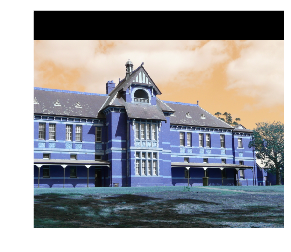

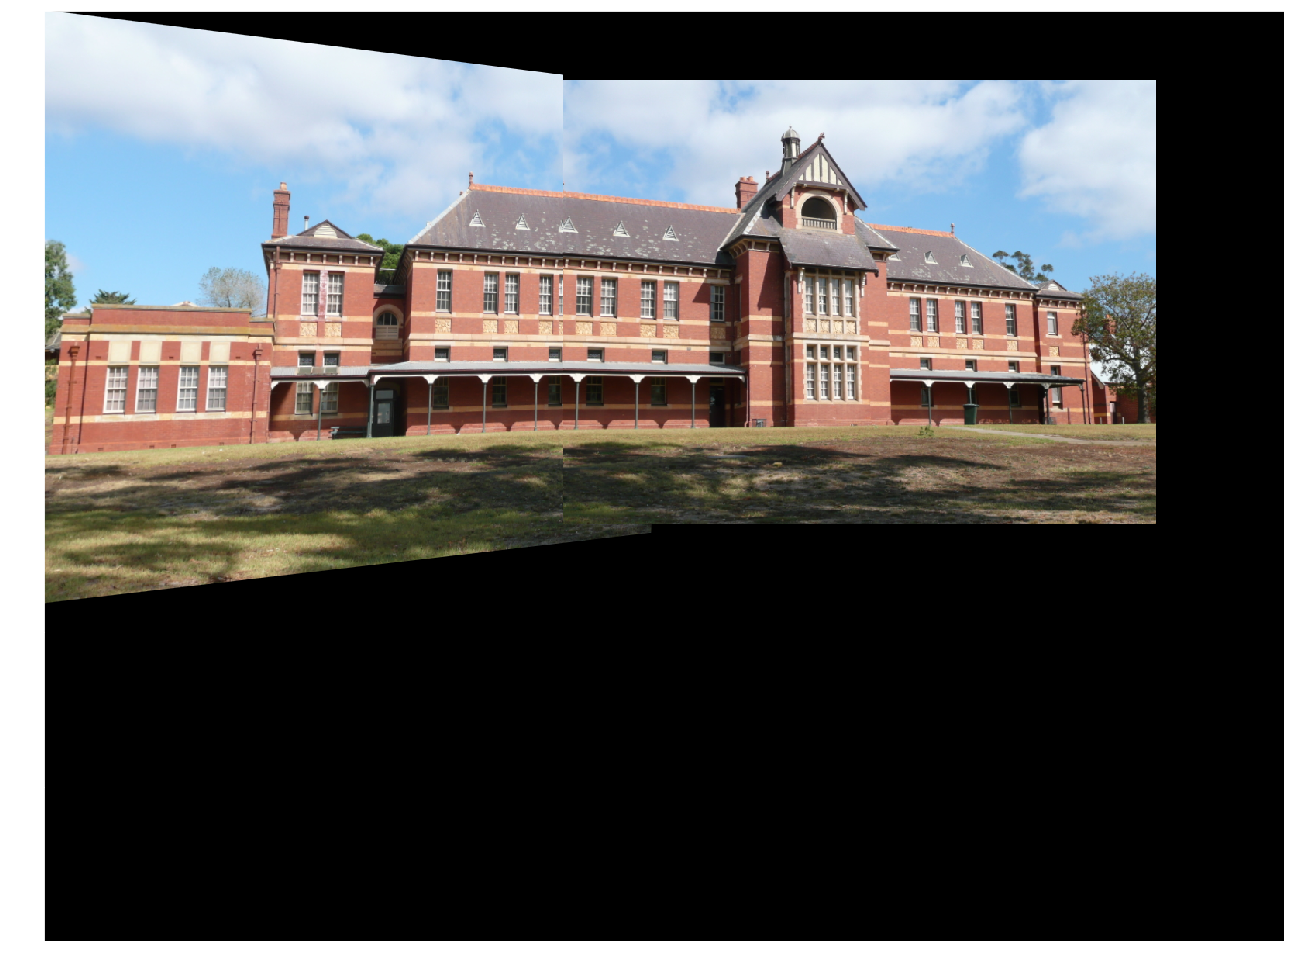

In [144]:
Hcopy = H.copy()
res,res2=stitch_image(img1,img2,Hcopy)
fig=plt.figure(figsize=(20, 18), dpi= 80, facecolor='w', edgecolor='k')
# res = cv2.warpPerspective(img1, Hcopy,(int(img1.shape[1]*2), int(img1.shape[0]*2)))

plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))
cv2.imwrite("res.png",res)


(573, 765, 3)


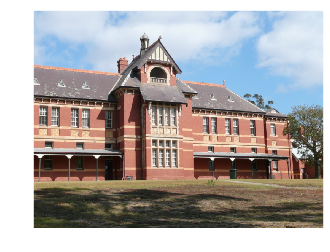

In [138]:
# fig=plt.figure(figsize=(20, 18), dpi= 80, facecolor='w', edgecolor='k')
print(res2.shape)
plt.imshow(cv2.cvtColor(res2,cv2.COLOR_BGR2RGB))


336


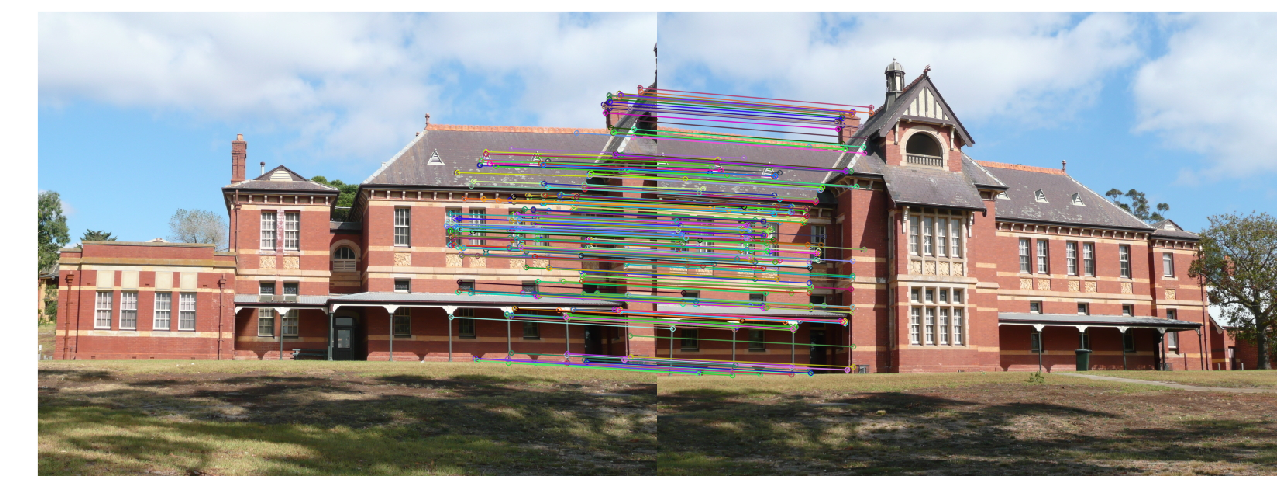

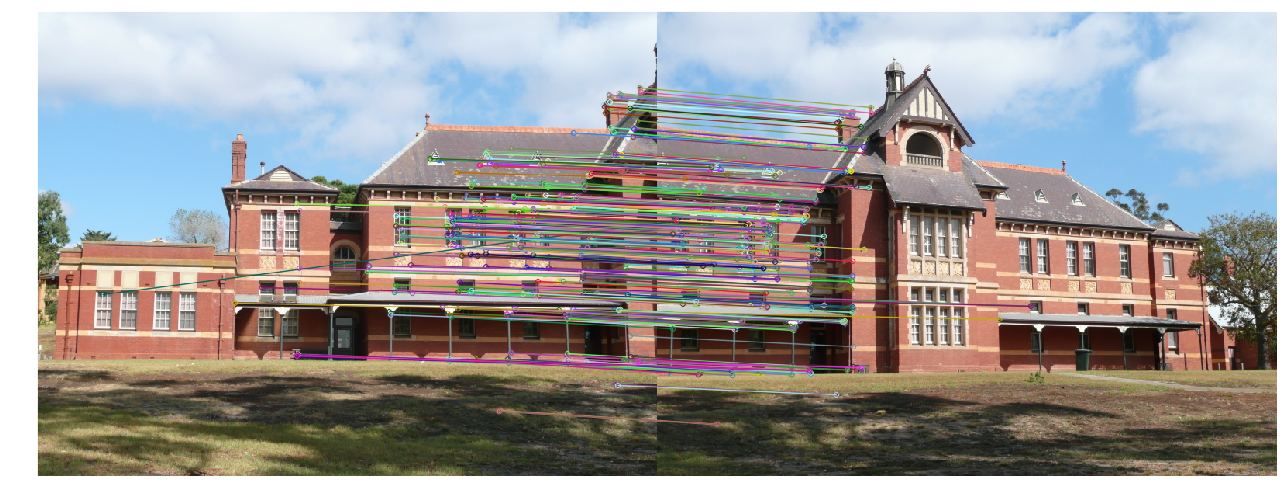

In [139]:
mask = np.array(inlier_ind, dtype=bool)
mfilter = []
for idx,i in enumerate(mask):
    if i == True:
        mfilter.append(dMatch[idx])
img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
print(len(mfilter))
f=cv2.drawMatches(img1, kp1, img2, kp2, mfilter, img_matches, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
fig=plt.figure(figsize=(20, 18), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.show()
f=cv2.drawMatches(img1, kp1, img2, kp2, dMatch, img_matches, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
fig=plt.figure(figsize=(20, 18), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.show()

In [140]:
print(res.shape)

(1200, 1600, 3)


In [141]:
print(res.shape)

(1200, 1600, 3)
